In [ ]:
import pandas as pd
import numpy as np
import re
import nltk

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt

print("Downloading NLTK 'punkt' and 'stopwords' data...")
nltk.download('punkt')
nltk.download('stopwords')
print("NLTK downloads complete!")

print("\nAll necessary libraries imported and NLTK data downloaded.")

NLTK downloads complete!

All necessary libraries imported and NLTK data downloaded.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from google.colab import files

print("Please upload your 'imdb_reviews.csv' file now.")
print("A 'Choose Files' button will appear below this cell after you run it.")

uploaded = files.upload()
print(f"\nFile '{file_name}' uploaded successfully!")

try:
    df = pd.read_csv(file_name)
    print(f"\nDataset '{file_name}' loaded into DataFrame successfully!")
    print("\nFirst 5 rows of the dataset:")
    print(df.head())

    print("\nDataset Information:")
    df.info()

except Exception as e:
    print(f"\nError loading dataset: {e}")
    print("Please ensure the uploaded file is a valid CSV and is named 'imdb_reviews.csv' or adjust 'file_name' if different.")

print("\nOriginal Sentiment Distribution:")
print(df['sentiment'].value_counts())

df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})
print("\nSentiment Distribution (Numerical):")
print(df['sentiment'].value_counts())

Please upload your 'imdb_reviews.csv' file now.
A 'Choose Files' button will appear below this cell after you run it.


Saving IMDB Dataset.csv to IMDB Dataset.csv

File 'IMDB Dataset.csv' uploaded successfully!

Dataset 'IMDB Dataset.csv' loaded into DataFrame successfully!

First 5 rows of the dataset:
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB

Original Sentiment Distribution:
sentiment
positive    25000
negative    25000
Name: count, dtype: int64

S

In [ ]:
stemmer = PorterStemmer()

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-zA-Z]', ' ', text).lower()

    tokens = text.split()
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

print("Starting text preprocessing... This might take a while depending on dataset size.")
df['cleaned_review'] = df['review'].apply(preprocess_text)
print("Text preprocessing complete!")


print("\n--- Original vs. Cleaned Review Example ---")
original_review = df['review'].iloc[0]
print("Original Review:")
print(original_review)

cleaned_review = df['cleaned_review'].iloc[0]
print("\nCleaned Review:")
print(cleaned_review)


Starting text preprocessing... This might take a while depending on dataset size.
Text preprocessing complete!

--- Original vs. Cleaned Review Example ---
Original Review:
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italia

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

print("\nStarting feature extraction using TF-IDF...")

X = tfidf_vectorizer.fit_transform(df['cleaned_review']).toarray()

y = df['sentiment']

print("Feature extraction complete!")

print("Shape of Feature Matrix (X):", X.shape)

print("Shape of Target Vector (y):", y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\nData split into training and testing sets:")
print(f"X_train shape (training features): {X_train.shape}")
print(f"X_test shape (testing features): {X_test.shape}")
print(f"y_train shape (training labels): {y_train.shape}")
print(f"y_test shape (testing labels): {y_test.shape}")


Starting feature extraction using TF-IDF...
Feature extraction complete!
Shape of Feature Matrix (X): (50000, 5000)
Shape of Target Vector (y): (50000,)

Data split into training and testing sets:
X_train shape (training features): (40000, 5000)
X_test shape (testing features): (10000, 5000)
y_train shape (training labels): (40000,)
y_test shape (testing labels): (10000,)


In [ ]:
print("\n--- Building and Training Models ---")

print("\nBuilding and training Multinomial Naive Bayes model...")

mnb_model = MultinomialNB()

mnb_model.fit(X_train, y_train)
print("Multinomial Naive Bayes model trained successfully!")


print("\nBuilding and training Logistic Regression model...")
lr_model = LogisticRegression(max_iter=1000)

lr_model.fit(X_train, y_train)
print("Logistic Regression model trained successfully!")

print("\nBoth models have been trained on the provided training data.")


--- Building and Training Models ---

Building and training Multinomial Naive Bayes model...
Multinomial Naive Bayes model trained successfully!

Building and training Logistic Regression model...
Logistic Regression model trained successfully!

Both models have been trained on the provided training data.



--- Evaluating Model Performance ---

Evaluating Multinomial Naive Bayes Model:
Multinomial Naive Bayes Accuracy: 0.8489

Multinomial Naive Bayes Classification Report:
               precision    recall  f1-score   support

Negative (0)       0.86      0.84      0.85      5000
Positive (1)       0.84      0.86      0.85      5000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



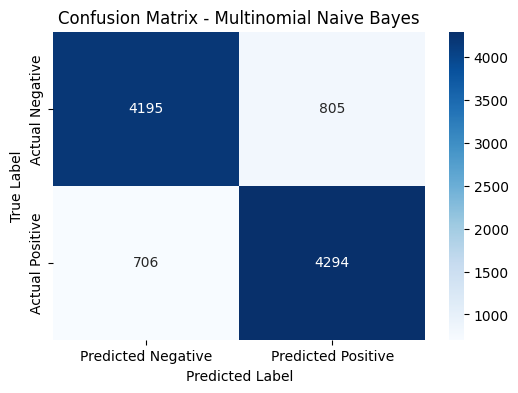


Evaluating Logistic Regression Model:
Logistic Regression Accuracy: 0.8877

Logistic Regression Classification Report:
               precision    recall  f1-score   support

Negative (0)       0.90      0.88      0.89      5000
Positive (1)       0.88      0.90      0.89      5000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



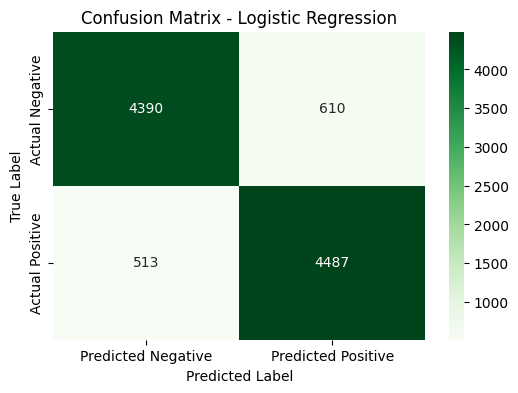


Model evaluation complete for both algorithms.
Compare the metrics to determine which model performed better for this task.


In [ ]:
# Model Evaluation

print("\n--- Evaluating Model Performance ---")

print("\nEvaluating Multinomial Naive Bayes Model:")

y_pred_mnb = mnb_model.predict(X_test)

print(f"Multinomial Naive Bayes Accuracy: {accuracy_score(y_test, y_pred_mnb):.4f}")

print("\nMultinomial Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_mnb, target_names=['Negative (0)', 'Positive (1)']))

cm_mnb = confusion_matrix(y_test, y_pred_mnb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_mnb, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Multinomial Naive Bayes')
plt.show()


print("\nEvaluating Logistic Regression Model:")

y_pred_lr = lr_model.predict(X_test)

print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")

print("\nLogistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr, target_names=['Negative (0)', 'Positive (1)']))

# 4.
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Logistic Regression')
plt.show() # Display the plot

print("\nModel evaluation complete for both algorithms.")
print("Compare the metrics to determine which model performed better for this task.")

In [ ]:
print("\n--- Testing Models with Random Reviews ---")

def predict_sentiment(review_text, model, vectorizer, preprocess_func):
    """
    Predicts the sentiment of a given review text using a trained model.

    Args:
        review_text (str): The raw text of the review.
        model: The trained scikit-learn classification model (e.g., mnb_model, lr_model).
        vectorizer: The fitted TF-IDF vectorizer (tfidf_vectorizer).
        preprocess_func: The preprocessing function (preprocess_text).

    Returns:
        str: 'Positive' or 'Negative' sentiment prediction.
    """

    cleaned_input = preprocess_func(review_text)
    print(f"Cleaned Input: {cleaned_input}")

    input_vector = vectorizer.transform([cleaned_input])

    # 3. Make the prediction
    prediction = model.predict(input_vector)

    # 4. Interpret the numerical prediction
    if prediction[0] == 1:
        return "Positive"
    else:
        return "Negative"

# --- Test with a few example reviews ---

print("\n--- Testing with Logistic Regression Model ---")

# Example 1: Clearly Positive Review
review1 = "This movie was absolutely brilliant! I loved every single moment. The acting, direction, and story were superb. Highly recommend watching it."
print(f"\nReview 1: {review1}")
prediction1 = predict_sentiment(review1, lr_model, tfidf_vectorizer, preprocess_text)
print(f"Prediction (Logistic Regression): {prediction1}")

# Example 2: Clearly Negative Review
review2 = "What a terrible film. The plot was confusing, the characters were boring, and the ending made no sense at all. A complete waste of time."
print(f"\nReview 2: {review2}")
prediction2 = predict_sentiment(review2, lr_model, tfidf_vectorizer, preprocess_text)
print(f"Prediction (Logistic Regression): {prediction2}")

# Example 3: Mixed or Neutral-leaning Review (can be tricky)
review3 = "The movie had some good visual effects, but the dialogue felt a bit forced. It wasn't great, but not entirely bad either. Just average."
print(f"\nReview 3: {review3}")
prediction3 = predict_sentiment(review3, lr_model, tfidf_vectorizer, preprocess_text)
print(f"Prediction (Logistic Regression): {prediction3}")

# Example 4: Short and concise
review4 = "Total masterpiece! Must watch."
print(f"\nReview 4: {review4}")
prediction4 = predict_sentiment(review4, lr_model, tfidf_vectorizer, preprocess_text)
print(f"Prediction (Logistic Regression): {prediction4}")


print("\n--- Testing with Multinomial Naive Bayes Model ---")

# Re-using the same reviews to compare
print(f"\nReview 1: {review1}")
prediction_mnb1 = predict_sentiment(review1, mnb_model, tfidf_vectorizer, preprocess_text)
print(f"Prediction (Naive Bayes): {prediction_mnb1}")

print(f"\nReview 2: {review2}")
prediction_mnb2 = predict_sentiment(review2, mnb_model, tfidf_vectorizer, preprocess_text)
print(f"Prediction (Naive Bayes): {prediction_mnb2}")

print(f"\nReview 3: {review3}")
prediction_mnb3 = predict_sentiment(review3, mnb_model, tfidf_vectorizer, preprocess_text)
print(f"Prediction (Naive Bayes): {prediction_mnb3}")

print(f"\nReview 4: {review4}")
prediction_mnb4 = predict_sentiment(review4, mnb_model, tfidf_vectorizer, preprocess_text)
print(f"Prediction (Naive Bayes): {prediction_mnb4}")


--- Testing Models with Random Reviews ---

--- Testing with Logistic Regression Model ---

Review 1: This movie was absolutely brilliant! I loved every single moment. The acting, direction, and story were superb. Highly recommend watching it.
Cleaned Input: movi absolut brilliant love everi singl moment act direct stori superb highli recommend watch
Prediction (Logistic Regression): Positive

Review 2: What a terrible film. The plot was confusing, the characters were boring, and the ending made no sense at all. A complete waste of time.
Cleaned Input: terribl film plot confus charact bore end made sens complet wast time
Prediction (Logistic Regression): Negative

Review 3: The movie had some good visual effects, but the dialogue felt a bit forced. It wasn't great, but not entirely bad either. Just average.
Cleaned Input: movi good visual effect dialogu felt bit forc great entir bad either averag
Prediction (Logistic Regression): Negative

Review 4: Total masterpiece! Must watch.
Clea

In [ ]:
# --- Interactive Sentiment Prediction Interface ---

print("\n--- Interactive Sentiment Analysis Demo ---")
print("Enter a movie review below to get its predicted sentiment.")
print("Type 'quit' or 'exit' to stop the demo.")

while True:
    user_review = input("\nYour Movie Review: ")

    if user_review.lower() in ['quit', 'exit']:
        print("Exiting sentiment analysis demo. Goodbye!")
        break # Exit the loop

    if not user_review.strip():
        print("Please enter a review.")
        continue

    print("\nProcessing your review...")

    try:
        # 1. Preprocess the raw input review
        cleaned_input = preprocess_text(user_review)
        print(f"Cleaned Input: '{cleaned_input}'")

        # 2. Transform the cleaned text into a numerical feature vector
        # Use the *already fitted* tfidf_vectorizer
        input_vector = tfidf_vectorizer.transform([cleaned_input])

        # Ensure the input vector is not empty (e.g., if review was only stopwords)
        if input_vector.sum() == 0:
            print("Warning: The review became empty after preprocessing and TF-IDF transformation. Cannot make a meaningful prediction.")
            print("Try a review with more unique words.")
            continue

        # 3. Make predictions with both models
        lr_prediction_numerical = lr_model.predict(input_vector)[0]
        mnb_prediction_numerical = mnb_model.predict(input_vector)[0]

        # 4. Interpret the numerical predictions
        lr_sentiment = "Positive" if lr_prediction_numerical == 1 else "Negative"
        mnb_sentiment = "Positive" if mnb_prediction_numerical == 1 else "Negative"

        print(f"\n--- Sentiment Predictions ---")
        print(f"Logistic Regression predicts: {lr_sentiment}")
        print(f"Multinomial Naive Bayes predicts: {mnb_sentiment}")

    except Exception as e:
        print(f"An error occurred during prediction: {e}")
        print("Please try entering another review.")


--- Interactive Sentiment Analysis Demo ---
Enter a movie review below to get its predicted sentiment.
Type 'quit' or 'exit' to stop the demo.

Your Movie Review: i saw the movie , movie story was actually good but very boring scenes

Processing your review...
Cleaned Input: 'saw movi movi stori actual good bore scene'

--- Sentiment Predictions ---
Logistic Regression predicts: Negative
Multinomial Naive Bayes predicts: Negative

Your Movie Review: i enjoyed the movie very much

Processing your review...
Cleaned Input: 'enjoy movi much'

--- Sentiment Predictions ---
Logistic Regression predicts: Positive
Multinomial Naive Bayes predicts: Positive

Your Movie Review: i liked the movie but my friends dont like it 

Processing your review...
Cleaned Input: 'like movi friend dont like'

--- Sentiment Predictions ---
Logistic Regression predicts: Negative
Multinomial Naive Bayes predicts: Negative

Your Movie Review: quit
Exiting sentiment analysis demo. Goodbye!
